## Introduction
<p><img src="https://assets.datacamp.com/production/project_1174/img/trendlines.jpg" alt="Image of two trendlines over time."></p>
<p>It’s important to stay informed about trends in programming languages and technologies. Knowing what languages are growing or shrinking can help you decide where to invest. </p>
<p>An excellent source to gain a better understanding of popular technologies is <a href="https://stackoverflow.com/">Stack Overflow</a>. Stack overflow is an online question-and-answer site for coding topics. By looking at the number of questions about each technology, you can get an idea of how many people are using it.</p>
<p>You'll be working with a dataset with one observation for each tag in each year. The dataset was downloaded from the <a href="https://data.stackexchange.com/">Stack Exchange Data Explorer</a>. Below you can find an overview of the data that is available to you:<br><br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/stack_overflow_data.csv</b></div>
<ul>
    <li><b>year:</b> The year the question was asked.</li>
    <li><b>tag:</b> A word or phrase that describes the topic of the question.</li>
    <li><b>number:</b> The number of questions with a certain tag in that year.</li>
    <li><b>year_total:</b> The total number of questions asked in that year.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/41">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around data manipulation and visualization in the Tidyverse and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/introduction-to-the-tidyverse">Introduction to the Tidyverse</a>.</em></p>

In [61]:
# Use this cell to begin your analysis, and add as many as you would like!
# import packages
library(dplyr)
library(readr)
library(ggplot2)
# read data
df <- read_csv('datasets/stack_overflow_data.csv')

# take a look of first 5 rows
head(df)

# glimpse the df
glimpse(df)

Parsed with column specification:
cols(
  year = col_double(),
  tag = col_character(),
  number = col_double(),
  year_total = col_double()
)


year,tag,number,year_total
<dbl>,<chr>,<dbl>,<dbl>
2008,treeview,69,168541
2008,scheduled-tasks,30,168541
2008,specifications,21,168541
2008,rendering,35,168541
2008,http-post,6,168541
2008,static-assert,1,168541


Rows: 420,066
Columns: 4
$ year       <dbl> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 20...
$ tag        <chr> "treeview", "scheduled-tasks", "specifications", "render...
$ number     <dbl> 69, 30, 21, 35, 6, 1, 159, 10, 4, 20, 11, 5, 19, 2, 19, ...
$ year_total <dbl> 168541, 168541, 168541, 168541, 168541, 168541, 168541, ...


In [62]:
#####
# What fraction of the total number of questions asked in 2019 had the R tag?
#####

r_percentage <- df %>%
    # filter year in 2019 and tag = r
    filter(year == 2019, tag == 'r') %>%
    summarise(r_percentage = number/year_total*100)

r_percentage

r_percentage
<dbl>
0.9656728


In [63]:
#####
# What were the five most asked-about tags in the last 5 years (2015-2020)?
#####
top_5 <- df %>%
    # filter year >= 2015
    filter(year >= 2015) %>%
    # group by tag
    group_by(tag) %>%
    #total number been asked during 5 years
    summarise(total_number = sum(number)) %>%
    # arrange by number in descending order
    arrange(desc(total_number)) %>%
    # top 5
    top_n(5, total_number)

highest_tags <- top_5$tag

highest_tags

[1] "javascript" "python"     "java"       "android"    "c#"

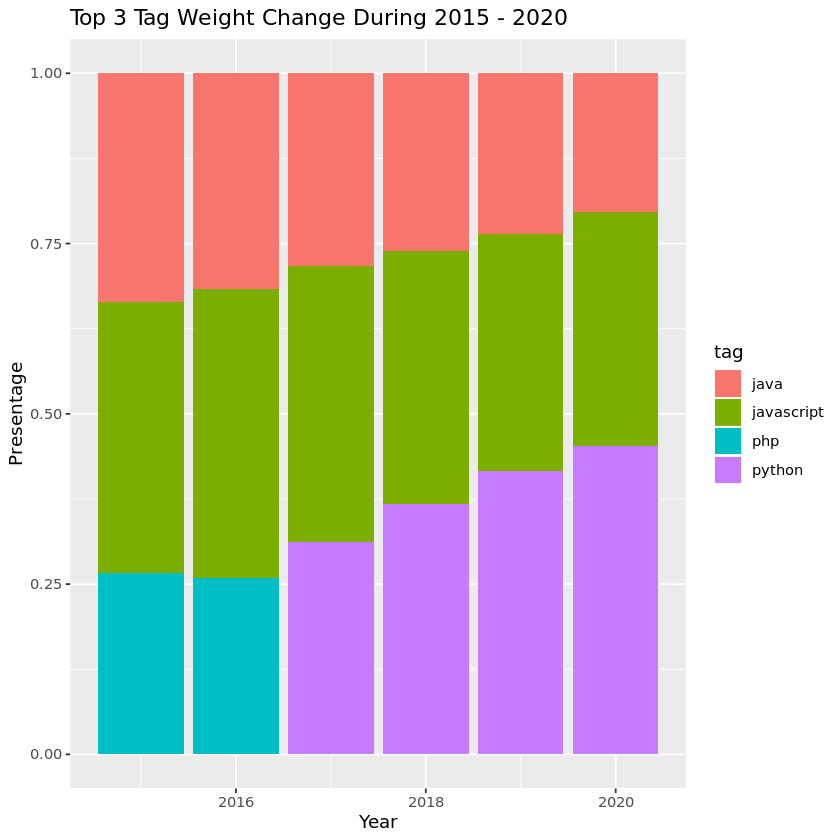

In [64]:
# trend analysis: top 3 tag over since 2015
bar_chart <- df %>%
    filter(year >= 2015) %>%
    group_by(year) %>%
    arrange(year) %>%
    top_n(3, number) %>%
    ggplot(aes(x = year, y = number, fill = tag)) +
        geom_bar(stat = "identity", position = 'fill') +
        ylab('Presentage') +
        xlab('Year') +
        ggtitle('Top 3 Tag Weight Change During 2015 - 2020')

bar_chart

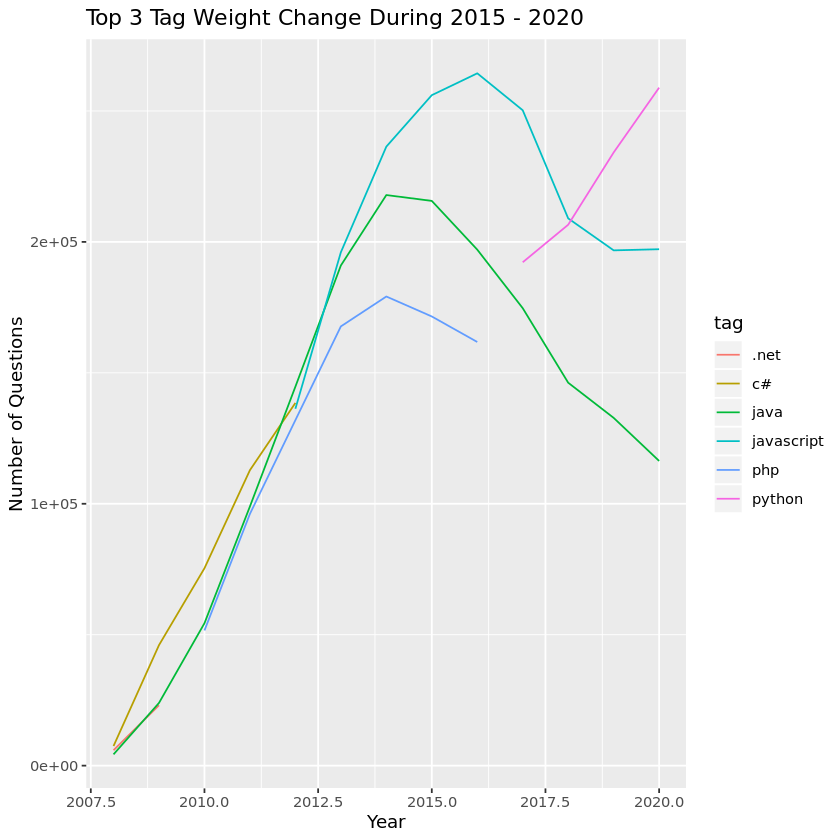

In [65]:
line_chart <- df %>%
#    filter(year >= 2015) %>%
    group_by(year) %>%
    arrange(year) %>%
    top_n(3, number) %>%
    ggplot(aes(x = year, y = number, color = tag)) +
        geom_line() +
        ylab('Number of Questions') +
        xlab('Year') +
        ggtitle('Top 3 Tag Weight Change During 2015 - 2020')

line_chart